## Atividade 1: Exercícios de fixação
- Henrique de S. Q. dos Santos, NUSP 10819029
- Witor M. A. de Oliveira, NUSP 10692190




Autorizando a leitura de arquivos armazenados no Drive


In [ ]:
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Descomprimindo arquivos
import zipfile
with zipfile.ZipFile("/content/drive/My Drive/data.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/drive/My Drive/data")

Importando bibliotecas

In [ ]:
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Ex. 1

Leia os dados com erro novamente, faça a limpeza e remova as duas últimas colunas.

In [ ]:
# Fazendo a leitura do CSV
df = pd.read_csv('/content/drive/My Drive/data/data/iris-with-errors.csv', header=(0))

In [ ]:
# Exibindo df antes da limpeza de dados
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada


In [ ]:
# Fazendo a remoção das linhas com NaN
df = df.dropna()

In [ ]:
# Removendo linhas duplicadas
if (df.duplicated().any()):
    df = df.drop_duplicates()

In [ ]:
# Substituindo valores desconhecidos (?) por NaN e removendo os valores NaN
df = df.replace('?', np.nan)
df = df.dropna()

In [ ]:
# Removendo as duas últimas colulnas
num_cols = len(df.columns)
df = df.drop(columns=df.columns[[num_cols-2, num_cols-1]])

In [ ]:
df.head(5)

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
3,4.7,3.2,1.3
6,5,3.6,1.4
7,5.4,3.9,1.7
10,5,3.4,1.5


### Ex. 2
Leia os dados com erro novamente e insira a mediana de cada atributo onde for encontrada NaN.

In [ ]:
# Fazendo a leitura do CSV
df = pd.read_csv('/content/drive/My Drive/data/data/iris-with-errors.csv', header=(0))

In [ ]:
# Removendo linhas duplicadas
if (df.duplicated().any()):
    df = df.drop_duplicates()

In [ ]:
# Substituindo valores desconhecidos por NaN
df.replace('?', np.nan, inplace=True)

In [ ]:
# Percorrendo as colunas do dataframe e substituindo os valores NaN pelo valor da mediana de cada coluna, execeto na última coluna
for i in list(df)[:-1]:
  aux = df[i].median()
  df[i].fillna(aux, inplace=True)

In [ ]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
2,5,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
5,5,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa


### Ex. 3
Conside os dados da Iris e mostre a distribuição de probabilidades de cada uma das variáveis após a normalização e padronização.

In [ ]:
# Fazendo a leitura do CSV
df = pd.read_csv('/content/drive/My Drive/data/data/iris.csv', header=(0))

In [ ]:
# Normalização dos dados

min_max_scaler = MinMaxScaler() # Inicializando função de transformação

df2 = df.iloc[:,:-1] # Salvando variáveis (não salvo a coluna target/classe)
X = df2.values # Salvando valores em um array

X_scaled = min_max_scaler.fit_transform(X) # Escalando variáveis

# Criando um novo dataframe com os dados normalizados
df2 = pd.DataFrame(X_scaled, columns=df2.columns)

df2.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [ ]:
# Padronização dos dados
standardScaler = StandardScaler().fit(X) # Inicializando função de transformação

df2 = df.iloc[:,:-1] # Salvando variáveis (não salvo a coluna target/classe)
X = df2.values # Salvando valores em um array

X_scaled = standardScaler.transform(X)

print(X_scaled)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [ ]:
# Verificando se cada coluna possui média 0 e desvio padrão igual a 1 (distribuição de probabilidades)
for i in np.arange(0, X_scaled.shape[1]):

    # Calculando a diferença absoluta entre o valor médio e do standard deviation (desvio padrão) da coluna "i"
    # e o valor 1. Assim, saberemos se o resultado está próximo do que queremos
    if (abs(np.mean(X_scaled[:,i]) - 0) <= 1) and (abs(np.std(X_scaled[:,i]) - 1) <= 1) :
        print("Coluna",i, "normalizada.\n")
    else:
        print("Média da coluna",i,np.mean(X_scaled[:,i]),"\n")
        print("Desvio padrão da coluna",i,np.std(X_scaled[:,i]),"\n")

Coluna 0 normalizada.

Coluna 1 normalizada.

Coluna 2 normalizada.

Coluna 3 normalizada.



### Ex. 4
Reamostre os dados da Iris e selecione 10 elementos em cada classe.

In [ ]:
# Fazendo a leitura do CSV
df = pd.read_csv('/content/drive/My Drive/data/data/iris.csv', header=(0))

In [ ]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Contabilizando quantos valores existem para cada classe
num_classes = df[df.columns[-1]].value_counts()

print(num_classes)

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64


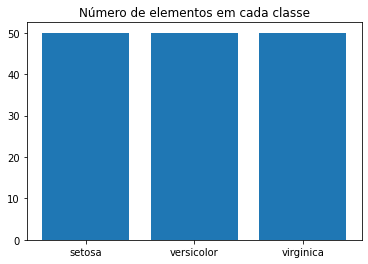

In [ ]:
# Salvando unicamente as classes existentes no dataframe
classes = np.unique(df[df.columns[-1]])

# número de classes
numbers = np.arange(0, len(classes))

# Plotando um gráfico de barras para mostrar a qntd de amostras em cada classe
plt.bar(numbers, num_classes)

plt.xticks(numbers, classes) # mostra o nome das classes ao invés dos números
plt.title('Número de elementos em cada classe') # alterando título

plt.show()

In [ ]:
# Selecionando aleatoriamente 10 valores de cada classe

# Fonte: https://stackoverflow.com/a/46128248/10304974
# Fonte: https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.sample.html

N = 10 # número de amostras que queremos

# Agrupando os valores da coluna target e aplicando a função pd.sample em cada grupo
df.groupby(df.columns[-1]).apply(pd.DataFrame.sample, n=N).reset_index(drop=True)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.4,3.4,1.7,0.2,setosa
1,5.5,3.5,1.3,0.2,setosa
2,5.2,3.5,1.5,0.2,setosa
3,5.4,3.9,1.7,0.4,setosa
4,4.9,3.1,1.5,0.1,setosa
5,5.4,3.9,1.3,0.4,setosa
6,5.1,3.4,1.5,0.2,setosa
7,5.0,3.4,1.6,0.4,setosa
8,5.0,3.2,1.2,0.2,setosa
9,5.4,3.4,1.5,0.4,setosa


### Ex. 5
Monte um boxplot para cada variável dos dados da Iris.

In [ ]:
# Fazendo a leitura do CSV
df = pd.read_csv('/content/drive/My Drive/data/data/iris.csv', header=(0))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f48e4055be0>,
      dtype=object)

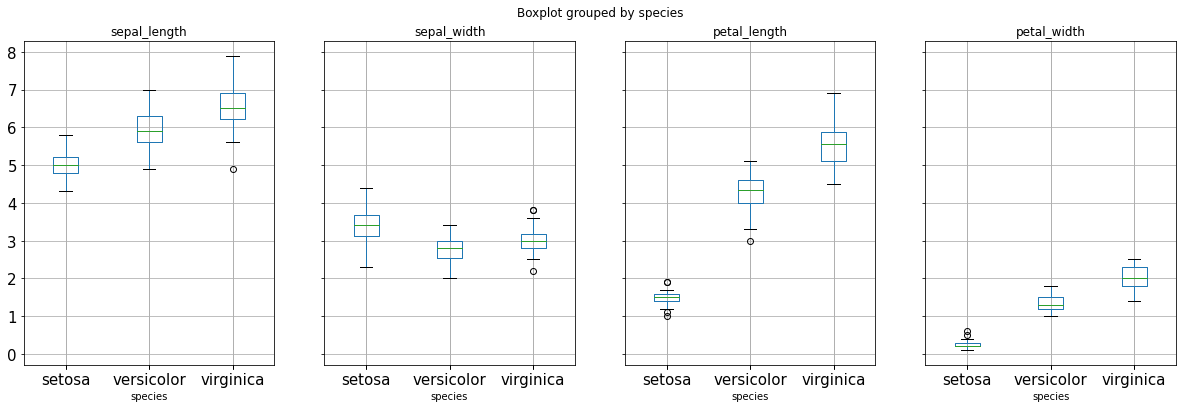

In [ ]:
df.boxplot(column=list(df)[:-1], by='species', figsize=(20, 6), fontsize=15, layout=(1, 4))

### Ex. 6
Encontre os outliers nos dados das bases Iris e BostonHouse.

#### Iris Dataset

In [ ]:
# Fazendo a leitura do CSV
df_iris = pd.read_csv('/content/drive/My Drive/data/data/iris.csv', header=(0))

In [ ]:
# Criando os quartis
Q1 = df_iris.quantile(0.25)
Q3 = df_iris.quantile(0.75)

# Criando distância interquartil
IQR = Q3 - Q1

In [ ]:
# Calculando outliers
outlier = ((df_iris < (Q1 - 1.5 * IQR)) | (df_iris > (Q3 + 1.5 * IQR))).any(axis=1)

for index, value in outlier.iteritems():
    if (value == True):
        print("Outlier index:",index)

Outlier index: 15
Outlier index: 32
Outlier index: 33
Outlier index: 60


#### BostonHousing Dataset

In [ ]:
# Fazendo a leitura do CSV
df_boston = pd.read_csv('/content/drive/My Drive/data/data/BostonHousing.csv', header=(0))

In [ ]:
# Criando os quartis
Q1 = df_boston.quantile(0.25)
Q3 = df_boston.quantile(0.75)

# Criando distância interquartil
IQR = Q3 - Q1

In [ ]:
# Calculando outliers

outlier = ((df_boston < (Q1 - 1.5 * IQR)) | (df_boston > (Q3 + 1.5 * IQR))).any(axis=1)

for index, value in outlier.iteritems():
    if (value == True):
        print("Outlier index:",index)

Outlier index: 18
Outlier index: 25
Outlier index: 27
Outlier index: 32
Outlier index: 34
Outlier index: 39
Outlier index: 40
Outlier index: 54
Outlier index: 55
Outlier index: 56
Outlier index: 57
Outlier index: 65
Outlier index: 66
Outlier index: 97
Outlier index: 98
Outlier index: 102
Outlier index: 118
Outlier index: 134
Outlier index: 141
Outlier index: 142
Outlier index: 145
Outlier index: 146
Outlier index: 151
Outlier index: 152
Outlier index: 153
Outlier index: 154
Outlier index: 155
Outlier index: 156
Outlier index: 157
Outlier index: 160
Outlier index: 161
Outlier index: 162
Outlier index: 163
Outlier index: 165
Outlier index: 166
Outlier index: 167
Outlier index: 168
Outlier index: 169
Outlier index: 170
Outlier index: 179
Outlier index: 180
Outlier index: 182
Outlier index: 186
Outlier index: 187
Outlier index: 188
Outlier index: 189
Outlier index: 190
Outlier index: 191
Outlier index: 192
Outlier index: 193
Outlier index: 194
Outlier index: 195
Outlier index: 196
Outlier 